# Basic AutoEncoder

In [12]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import layers

In [14]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [15]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.4.1


In [3]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [4]:
# This is our input image
input_img = tf.keras.Input(shape=(784,))

In [7]:
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [9]:
# This model maps an input to its reconstruction
autoencoder = tf.keras.Model(input_img, decoded)

In [17]:
# This model maps an input to its encoded representation
encoder = tf.keras.Model(input_img, encoded)

In [18]:
# This is our encoded (32-dimensional) input
encoded_input = tf.keras.Input(shape=(encoding_dim,))

In [19]:
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [20]:
# Create the decoder model
decoder = tf.keras.Model(encoded_input, decoder_layer(encoded_input))

In [21]:
# First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Dataset Preparation

In [22]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [23]:
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [24]:
#Now let's train our autoencoder for 50 epochs:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test) )

Epoch 1/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3830 - val_loss: 0.1895
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1795 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1489 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1315 - val_loss: 0.1215
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1208 - val_loss: 0.1133
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1131 - val_loss: 0.1074
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1075 - val_loss: 0.1030
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1033 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1001 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0979 - val_lo

In [25]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [26]:
encoded_imgs ##Abstracted features

array([[ 5.534267 ,  2.7474787,  8.741858 , ...,  3.6478682,  5.775652 ,
         2.8092744],
       [11.924877 ,  9.329057 ,  8.171438 , ...,  4.642367 ,  6.384075 ,
        12.602856 ],
       [ 5.738245 ,  3.515531 ,  1.8794122, ...,  8.225846 ,  8.02481  ,
         5.4869103],
       ...,
       [ 7.167814 , 13.860037 , 15.94001  , ...,  3.2614584,  8.890354 ,
         7.673049 ],
       [ 7.041228 ,  5.9134474, 13.31692  , ...,  8.691695 ,  2.2157383,
         8.906549 ],
       [ 6.6658616,  9.017747 ,  8.676967 , ..., 14.854109 , 12.432209 ,
        21.978062 ]], dtype=float32)

In [27]:
decoded_imgs ##Pixeled Vectors

array([[1.90078397e-09, 3.37514711e-10, 3.57653240e-10, ...,
        3.33790662e-10, 1.85277260e-09, 5.87256188e-10],
       [5.29801272e-11, 4.18058449e-10, 9.53937970e-11, ...,
        4.23031367e-11, 3.58553950e-11, 1.38029962e-10],
       [4.75782144e-07, 6.10877919e-07, 3.65521601e-07, ...,
        1.89597742e-07, 3.00972545e-07, 7.50798165e-07],
       ...,
       [1.67221922e-13, 7.07245236e-15, 1.51185705e-13, ...,
        5.72432277e-15, 8.54511300e-14, 1.57121241e-14],
       [1.68930690e-12, 7.99910431e-13, 5.15383472e-13, ...,
        5.01485680e-13, 4.12146966e-12, 2.19432176e-12],
       [7.56530951e-18, 1.99569664e-17, 1.00461827e-16, ...,
        4.85367715e-19, 2.28818113e-18, 3.85794349e-18]], dtype=float32)

In [10]:
%matplotlib inline

Here's what we get. The top row is the original digits, and the bottom row is the reconstructed digits. We are losing quite a bit of detail with this basic approach.

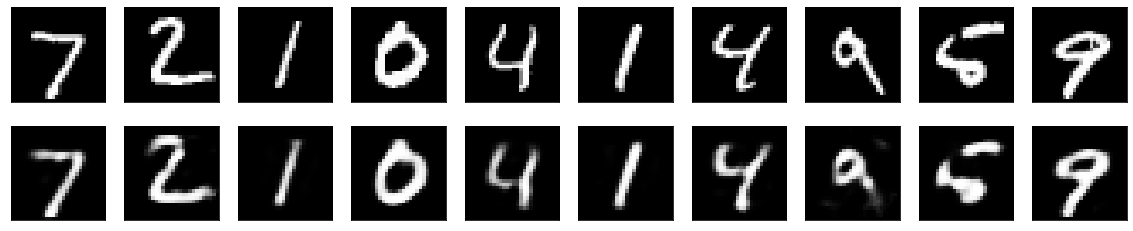

In [28]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# AutoEncoder for Code Representation